In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
# 데이터셋 로드 => seaborn에 내장 dataset인 'diamonds'을 이용
df = sns.load_dataset('diamonds') # 다이아몬드 관련 데이터셋 로드

- **price:** 가격 (\$326 - \$18,823)
- **carat:** 무게 (0.2, 5.01)
- **cut:** 컷팅의 가치 (Fair, Good, Very Good, Premium, Ideal)
- **color:** 다이아몬드 색상(J(가장 나쁜)에서 D(가장 좋은)까지)
- **clarity:** 깨끗함 (I1 (가장 나쁜), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (가장 좋은))
- **x:** 길이 (0, 10.74mm)
- **y:** 너비 (0, 58.9mm)
- **z:** 깊이 (0, 31.8mm)
- **depth:** 깊이 비율 = z / mean(x, y)
- **table:** 가장 넓은 부분의 너비 대비 다이아몬드 꼭대기의 너비(43- 95)
- 참고) https://www2.stat.duke.edu/courses/Fall15/sta112.01/post/hw/HW1.html

In [141]:
# df 데이터셋의 행과 열의 크기 확인
df.shape

(53940, 10)

In [142]:
# df 데이터셋의 맨 앞 2개의 행, 맨 뒤 2개의 행을 한번에 보기 =>  display
display(df.head(2), df.tail(2))

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


,carat,cut,color,clarity,depth,table,price,x,y,z
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [143]:
# df의 컬럼명들 확인 & 출력 => columns
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [144]:
df.index

RangeIndex(start=0, stop=53940, step=1)

In [145]:
# df의 요약정보(non-null data 개수 & data type) 확인 => info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [146]:
# 각 컬럼별로 몇개의 NaN 값이 존재하는지 확인 sum(axis=0)
for col in df.columns:
    print('{}: {}'.format(col, sum(df[col].isnull())))

carat: 0
cut: 0
color: 0
clarity: 0
depth: 0
table: 0
price: 0
x: 0
y: 0
z: 0


In [147]:
# 인덱스별 null값 갯수확인 => sum(axis=1)
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
53935    0
53936    0
53937    0
53938    0
53939    0
Length: 53940, dtype: int64

In [148]:
# df 변수들 중 numeric(숫자형) 변수들의 분포 특성 파악
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


---

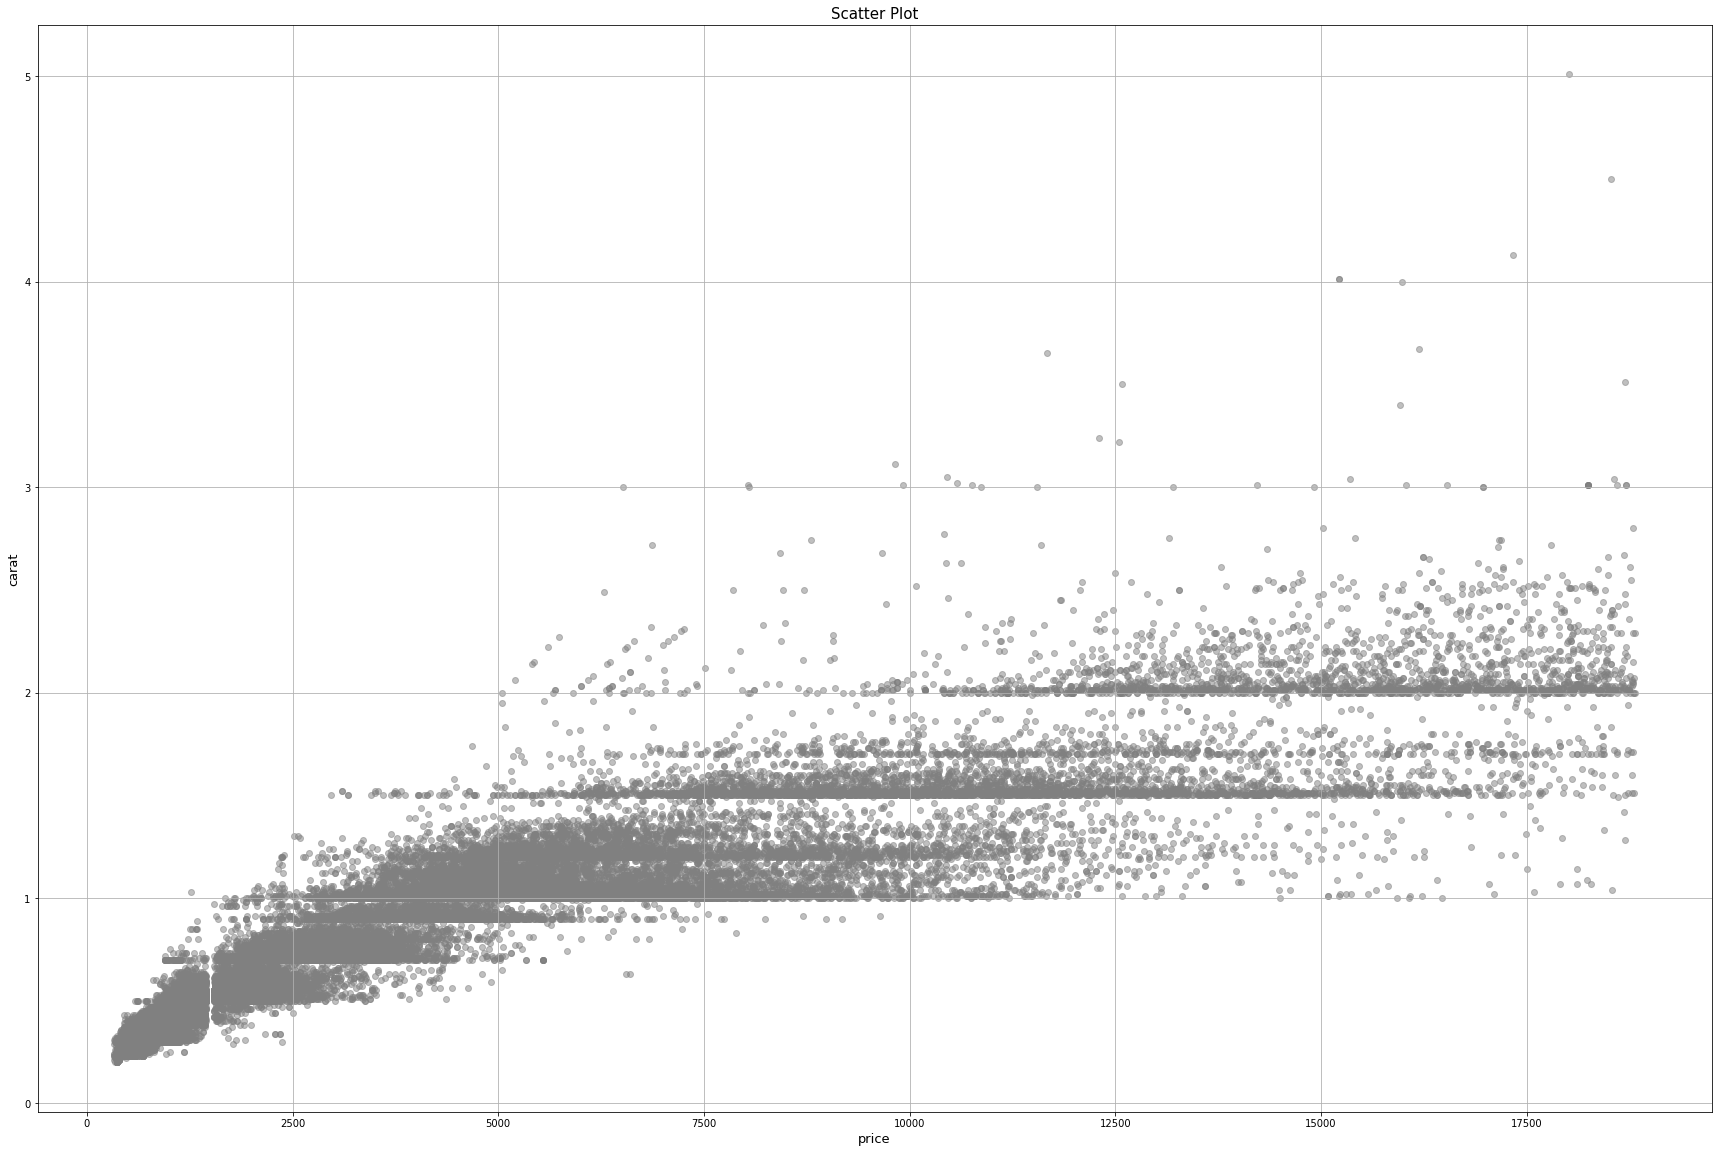

In [149]:
# price와 carat의 관계를 scatter plot으로 나타내라
plt.figure(figsize=(30,20))
plt.title("Scatter Plot", fontsize=15)
plt.scatter(df["price"], df["carat"], color='grey', alpha=.5)
plt.xlabel("price", fontsize=13)
plt.ylabel("carat", fontsize=13)
plt.grid()
plt.show()

In [150]:
# clarity(깨끗함)의 unique한 데이터 확인 및 출력
print(df['clarity'].unique())

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']


In [151]:
# df를 'clarity'를 기준으로 groupby 시킨 후, price의  min값, max값, 평균을 구하여라. 이렇게 구한 데이터프레임을 cl_df라는 변수에 할당
# 이때 ['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF'] 순서대로 행 index 정렬
cl_df = df.groupby(['clarity']).price.agg(['min','max','mean']).reindex(['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF'])
# cl_df = cl_df[::-1] 도 가능 
cl_df 

,min,max,mean
clarity,,,
I1,345,18531,3924.168691
SI1,326,18818,3996.001148
SI2,326,18804,5063.028606
VS1,327,18795,3839.455391
VS2,334,18823,3924.989395
VVS1,336,18777,2523.114637
VVS2,336,18768,3283.737071
IF,369,18806,2864.839106


In [152]:
cl_df.sort_values(by="mean",ascending=False)

,min,max,mean
clarity,,,
SI2,326,18804,5063.028606
SI1,326,18818,3996.001148
VS2,334,18823,3924.989395
I1,345,18531,3924.168691
VS1,327,18795,3839.455391
VVS2,336,18768,3283.737071
IF,369,18806,2864.839106
VVS1,336,18777,2523.114637


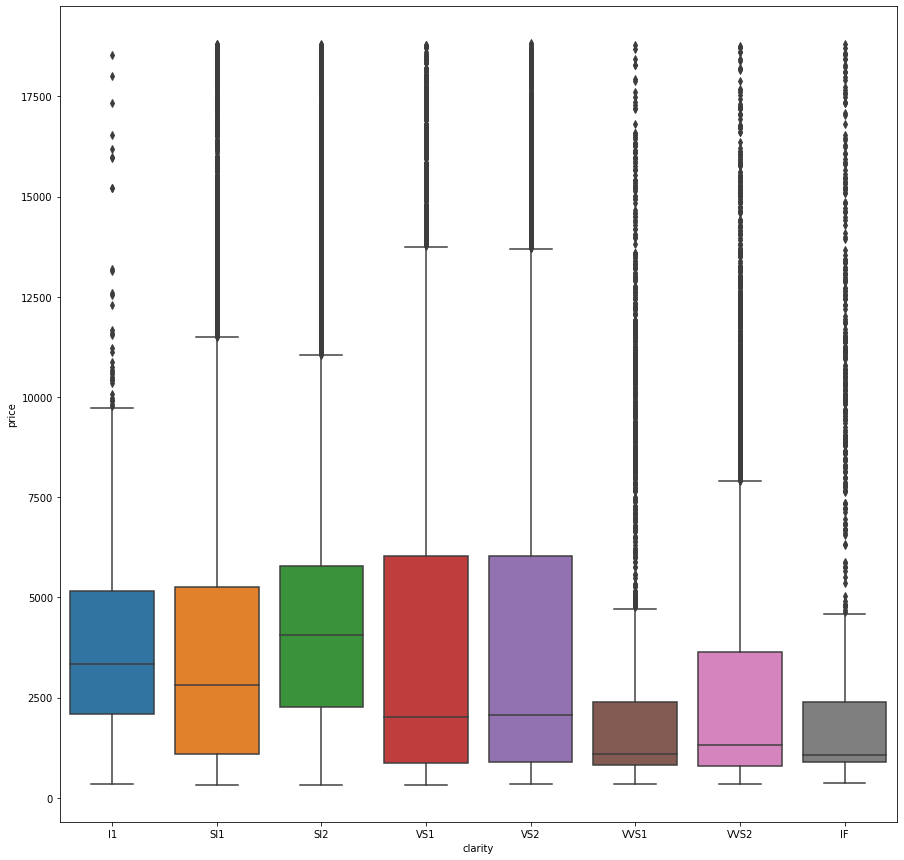

In [153]:
# df 데이터에 대해 clarity(x)별 price값의 분포(y)를 boxplot으로 시각화.
# 이때 x축의 순서는 ['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF']
plt.figure(figsize=(15,15))
sns.boxplot(x='clarity', y='price',data=df, order=['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF'])

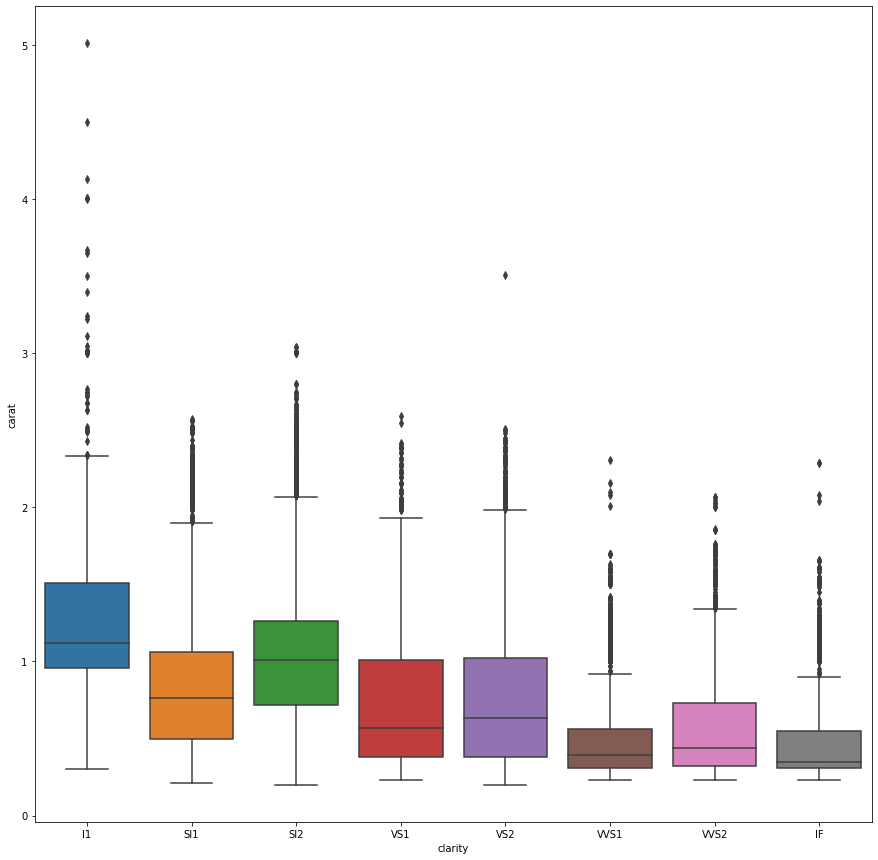

In [154]:
# df 데이터에 대해 clarity(x)별 carat값의 분포(y)를 boxplot으로 시각화.
# 마찬가지로 x축의 순서는 ['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF']
plt.figure(figsize=(15,15))
sns.boxplot(x='clarity', y='carat',data=df, order=['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF'])

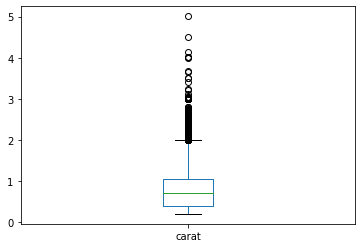

In [155]:
# carat의 분포를 boxplot으로 그려라.
# sns.boxplot(df['carat'],data=df)
df.carat.plot(kind='box')

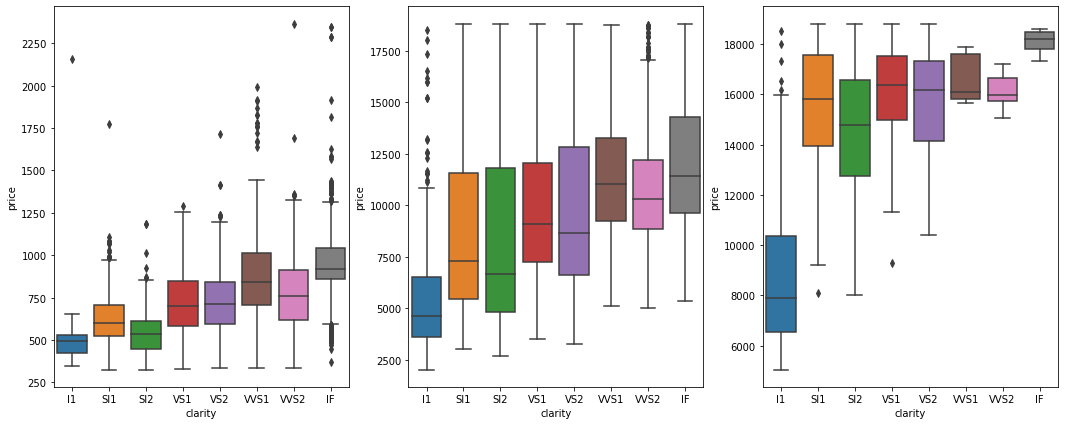

In [156]:
# seaborn을 이용하여 세개의 그래프를 그림. figure의 사이즈는 (18,4) & 가로로 나란히 두개의 그래프를 그림 (하나의 행 & 3개의 열)
# 첫번째 그래프: df에서 carat값이 1분위수 이하인 데이터를 뽑고, 뽑은 데이터를 이용하여 clarity(x)별 price값의 분포(y)를 boxplot으로 시각화.
# 두번쨰 그래프: df에서 carat값이 3분위수 이상인 데이터를 뽑고, 뽑은 데이터를 이용하여 clarity(x)별 price값의 분포(y)를 boxplot으로 시각화.
# 세번쨰 그래프: df에서 carat값이 2이상인 데이터를 뽑고, 뽑은 데이터를 이용하여 clarity(x)별 price값의 분포(y)를 boxplot으로 시각화.
# 이때 세 그래프 모두 # x축의 순서는 ['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF']
fig,axes = plt.subplots(1,3,figsize=(18, 7))
sns.boxplot(x='clarity', y='price',data=df[df.carat <= np.percentile(df.carat,25)], order=['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF'],ax=axes[0])
sns.boxplot(x='clarity', y='price',data=df[df.carat >= np.percentile(df.carat,75)], order=['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF'],ax=axes[1])
sns.boxplot(x='clarity', y='price',data=df[df.carat >= 2], order=['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF'],ax=axes[2])

In [157]:
# cut(컷팅의 가치)의 unique한 데이터 확인 및 출력
print(df['cut'].unique())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']


In [158]:
# df를 'cut'를 기준으로 groupby 시킨 후, price의  min값, max값, 평균을 구하여라.
cut_df = df.groupby(['cut']).price.agg(['min','max','mean'])
cut_df 

,min,max,mean
cut,,,
Ideal,326,18806,3457.541970
Premium,326,18823,4584.257704
Very Good,336,18818,3981.759891
Good,327,18788,3928.864452
Fair,337,18574,4358.757764


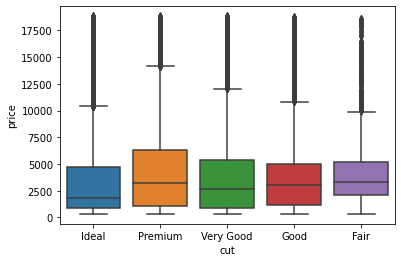

In [159]:
# df 데이터에 대해 cut(x)별 price값의 분포(y)를 boxplot으로 시각화.
sns.boxplot(x='cut', y='price',data=df)

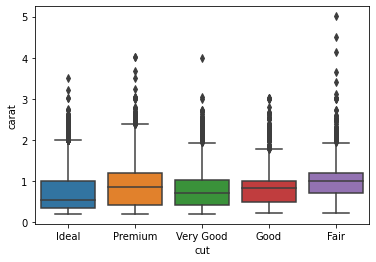

In [160]:
# df 데이터에 대해 cut(x)별 carat값의 분포(y)를 boxplot으로 시각화.
sns.boxplot(x='cut', y='carat',data=df)

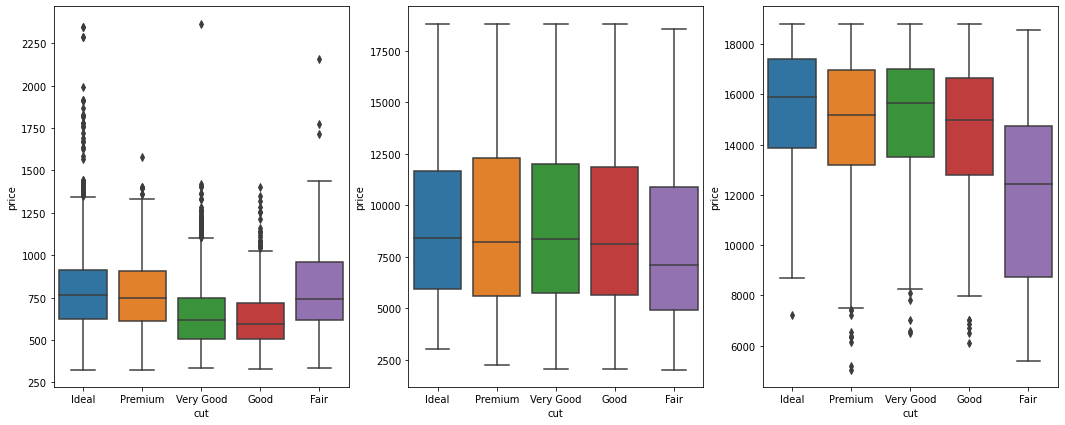

In [161]:
# seaborn을 이용하여 세개의 그래프를 그림. figure의 사이즈는 (18,4) & 가로로 나란히 두개의 그래프를 그림 (하나의 행 & 3개의 열)
# 첫번째 그래프: df에서 carat값이 1분위수 이하인 데이터를 뽑고, 뽑은 데이터를 이용하여 cut(x)별 price값의 분포(y)를 boxplot으로 시각화.
# 두번쨰 그래프: df에서 carat값이 3분위수 이상인 데이터를 뽑고, 뽑은 데이터를 이용하여 cut(x)별 price값의 분포(y)를 boxplot으로 시각화.
# 세번쨰 그래프: df에서 carat값이 2이상인 데이터를 뽑고, 뽑은 데이터를 이용하여 cut(x)별 price값의 분포(y)를 boxplot으로 시각화.
fig,axes = plt.subplots(1,3,figsize=(18, 7))
sns.boxplot(x='cut', y='price',data=df[df.carat <= np.percentile(df.carat,25)], ax=axes[0])
sns.boxplot(x='cut', y='price',data=df[df.carat >= np.percentile(df.carat,75)], ax=axes[1])
sns.boxplot(x='cut', y='price',data=df[df.carat >= 2],ax=axes[2])

---

<function matplotlib.pyplot.show>

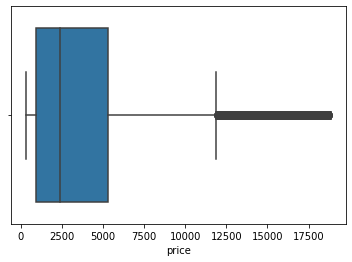

In [162]:
# df의 price를 boxplot으로 그리기
# 1) seaborn을 사용하여 그리기
sns.boxplot(x=df['price'],data=df)
plt.show

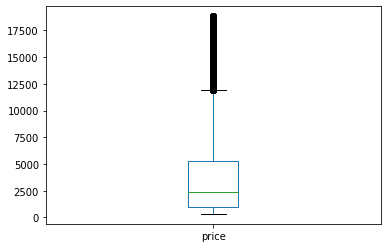

In [163]:
# 2) pandas의 plot을 이용하여 그리기
df.price.plot(kind='box')

In [164]:
# price의 IQR 구하기
#  Interquartile range의 약자로써 Q3 - Q1를 의미 => IQR은 Box Plot의 기본이 되는 수치
iqr = np.percentile(df.price, 75) - np.percentile(df.price, 25)
print(iqr)

4374.25


In [165]:
# price의 1분위수에서 1.5*iqr을 뺀 값을 min_whisker 변수에 할당 & 출력
min_whiske =  np.percentile(df.price, 25) - (1.5*iqr)
print(min_whiske)

# price의 3분위수에서 1.5*iqr을 더한 값을 max_whisker 변수에 할당 & 출력
max_whisker = np.percentile(df.price, 25) + (1.5*iqr)
print(max_whisker)

-5611.375
7511.375


In [166]:
# df에 outlier이라는 새로운 열 생성. 이때 price가 max_whisker보다 크거나 min_whisker보다 작은 경우는 'outlier', 그렇지 않은 경우는 'normal'인 값을 갖도록 하게 함
df['outlier'] = ['outlier' if ((p > max_whisker)|(p < min_whiske)) else 'normal' for p in df.price]


In [167]:
# df의 outlier변수 값이 outlier인 데이터의 개수 확인
print(df[df.outlier == 'outlier'].shape)

# df의 outlier변수 값이 normal인 데이터의 개수 확인
print(df[df.outlier == 'normal'].shape)

(8357, 11)
(45583, 11)


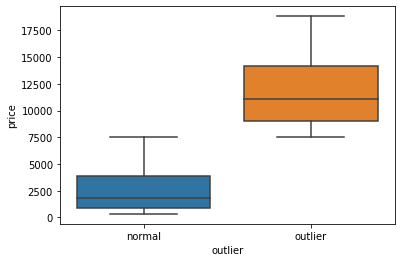

In [168]:
# outlier별 price를 boxplot으로 나타내기
sns.boxplot(x='outlier', y ='price', data=df)

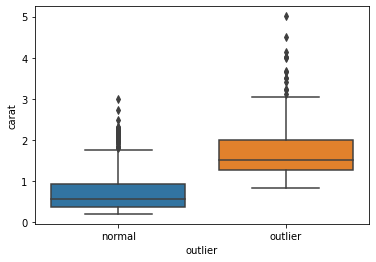

In [169]:
# outlier별 carat을 boxplot으로 나타내기
sns.boxplot(x='outlier', y ='carat', data=df)